In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
df.shape

(42, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
df.dtypes

Quarter     object
Sales      float64
dtype: object

In [6]:
df.isnull().values.any()

False

In [7]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot:>

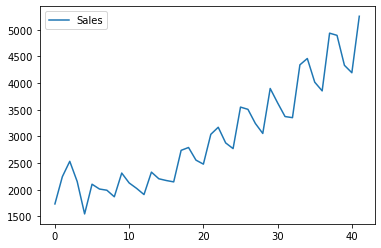

In [8]:
df.plot()

<AxesSubplot:ylabel='Count'>

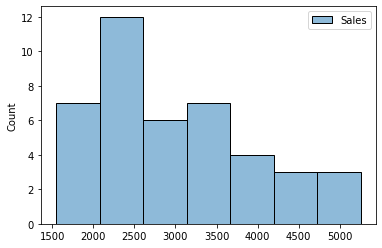

In [9]:
sns.histplot(df)

D:\bin\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

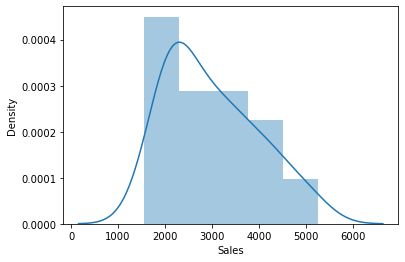

In [10]:
sns.distplot(df['Sales'])

In [11]:
df['quarter'] = 0
for i in range(len(df)):
    p=df['Quarter'][i]
    df['quarter'][i]=p[0:2]

C:\Users\bhara\AppData\Local\Temp/ipykernel_12516/1141389093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'][i]=p[0:2]
D:\bin\Anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
df

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [13]:
df_dummies=pd.DataFrame(pd.get_dummies(df['quarter']),columns=['Q1','Q2','Q3','Q4'])
df1=pd.concat([df,df_dummies],axis=1)

In [14]:
df1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [15]:
df1['t']=np.arange(1,43)
df1['t_squared']=df1['t']**2
df1["Sales_log"] =np.log(df['Sales'])

In [16]:
df1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [17]:
x=df1.head(32)
y=df1.tail(10)

In [18]:
y.shape

(10, 10)

<AxesSubplot:>

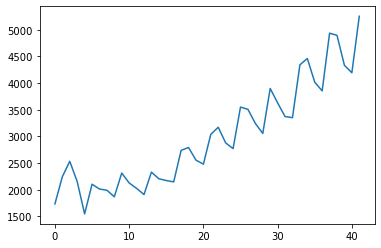

In [19]:
df['Sales'].plot()

In [20]:
## Model Building

In [21]:
## Linear model

In [22]:
linear_model =smf.ols("Sales~t",data=x).fit()
linear_pred = pd.Series(linear_model.predict(y['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(y['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767132

In [23]:
## Exponential Model

In [24]:
exp_model  =smf.ols("Sales_log~t",data=x).fit()
exp_pred =pd.Series(exp_model.predict(y['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(y['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [25]:
quad_model =smf.ols("Sales~t+t_squared",data=x).fit()
quad_pred = pd.Series(quad_model.predict(y[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(y['Sales']),np.array(quad_pred)))
quad_rmse

457.7357355407399

In [26]:
data={"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


In [27]:
## ARIMA Model

In [42]:
coke=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
coke.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [50]:
split_point = len(coke) - 7
dataset_cc, validation_cc = coke[0:split_point], coke[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

Dataset_cc 35, Validation_cc 7


In [53]:
dataset_cc.to_csv('dataset_cc.csv', header=False)
validation_cc.to_csv('validation_cc.csv', header=False)

In [54]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
train=read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

,1,2
0,,
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999


In [48]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

ValueError: could not convert string to float: 'Q1_86'